In [8]:
#


# Project 1: Mini Linear Algebra Library


#

In [9]:
import numpy as np

class Matrix:
    def __init__(self, data):
      self.data = np.array(data, dtype=float) # input to numerical matrix
    def __str__(self): # human readable output - [[1, 2], [3, 4]]
      return str(self.data)
    def __repr__(self):# representation output for developers(debugging) - Matrix([[1, 2], [3, 4]])
      return repr(self.data)           # otherwise <__main__.A object at 0x...>
    def shape(self):  # (rows, columns)
      return self.data.shape
    def transpose(self):
      return Matrix(self.data.T)
    def determinant(self):
      return np.linalg.det(self.data)
    def inverse(self):
      return Matrix(np.linalg.inv(self.data))
    def rank(self):
      return np.linalg.matrix_rank(self.data) 
# number of linearly independent rows or columns in the matrix 
# example [(1,2),(2,4)] rank is 1 , [(0,1),(2,4)] rank is 2 

In [10]:
class Vector:
    def __init__(self, data):
        self.data = np.array(data, dtype=float)
# |-> ENCASULATION - data is stored inside the Vector object, other-matrix transformation 
    def __str__(self):
        return str(self.data)
    def __repr__(self):
        return str(self.data)
    def norm(self): #magnitude ||x||
        return np.linalg.norm(self.data)
    def dot(self, vec):
        return np.dot(self.data, vec.data)  # ABSTRACTION
    def projection(self, vec):
        u = vec.data / np.linalg.norm(vec.data)
        proj = np.dot(self.data, u) * u
        return Vector(proj)
    def orthogonal_component(self, vec):
        return Vector(self.data - self.projection(vec).data)

In [11]:
pip install matrix vector

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
class Transformation:
    def __init__(self, matrix):
        self.matrix = matrix
    def apply(self, vector):
        transformed = np.dot(self.matrix.data, vector.data)
        return Vector(transformed)
    def rotation(self, theta): #changes direction or rotates vector
        return Transformation(Matrix([
            [np.cos(theta), -np.sin(theta)],
            [np.sin(theta),  np.cos(theta)]
        ]))
    def scaling(self, sx, sy): #changes size of vector x'=sx · x
        return Transformation(Matrix([
            [sx, 0],
            [0, sy]
        ]))
    def shearing(self, shx=0, shy=0): # slants the shape of an object in one direction
        #x' = x + shx · y ||| shy = 3 means y borrows 3× x
        return Transformation(Matrix([
            [1, shx],
            [shy, 1]
    ]))

In [13]:
#matrix
A = Matrix([[1, 2], [3, 4]])
B = Matrix([[2, 0], [1, 2]])
print("Transpose of A:\n", A.transpose())
print("Determinant of A:", A.determinant())
print("Inverse of A:\n", A.inverse())
print("Rank of A:", A.rank())

#vector
v1 = Vector([1, 2])
v2 = Vector([3, 4])
print("dot prod:", v1.dot(v2)) # ABSTRACTION
print("norm  v1:", v1.norm())
proj = v1.projection(v2)
print("projection v1 on v2:", proj)
orth = v1.orthogonal_component(v2)
print("orthogonal component of v1:", orth)

# matrix . vector
t = Transformation(Matrix([[1, 0], [0, 1]]))
rotation = t.rotation(np.pi / 4)
rotated_v1 = rotation.apply(v1)
print("Rotated v1:", rotated_v1)
scaling = t.scaling(1.5, 0.5)
scaled_v1 = scaling.apply(v1)
print("Scaled v1:", scaled_v1)
shear = t.shearing(1.0, 0.5)
sheared_v1 = shear.apply(v1)
print("Sheared v1:", sheared_v1)

Transpose of A:
 [[1. 3.]
 [2. 4.]]
Determinant of A: -2.0000000000000004
Inverse of A:
 [[-2.   1. ]
 [ 1.5 -0.5]]
Rank of A: 2
dot prod: 11.0
norm  v1: 2.23606797749979
projection v1 on v2: [1.32 1.76]
orthogonal component of v1: [-0.32  0.24]
Rotated v1: [-0.70710678  2.12132034]
Scaled v1: [1.5 1. ]
Sheared v1: [3.  2.5]


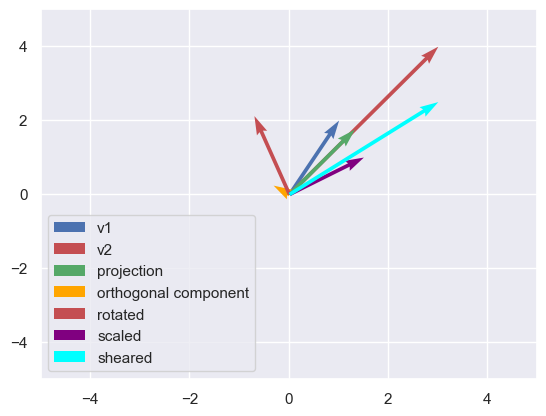

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()#for grid

v1 = np.array([1, 2])
v2 = np.array([3, 4])
proj_v1_on_v2 = np.array([1.32, 1.76])
orth_v1 = np.array([-0.32, 0.24])
rotated_v1 = np.array([-0.70710678, 2.12132034])
scaled_v1 = np.array([1.5, 1.0])
sheared_v1 = np.array([3.0, 2.5])

plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='r', label='v2')
plt.quiver(0, 0, proj_v1_on_v2[0], proj_v1_on_v2[1], angles='xy', scale_units='xy', scale=1, color='g', label='projection') #scales and angles in x y plane
plt.quiver(0, 0, orth_v1[0], orth_v1[1], angles='xy', scale_units='xy', scale=1, color='orange', label='orthogonal component')
plt.quiver(0, 0, rotated_v1[0], rotated_v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='rotated')
plt.quiver(0, 0, scaled_v1[0], scaled_v1[1], angles='xy', scale_units='xy', scale=1, color='purple', label='scaled')
plt.quiver(0, 0, sheared_v1[0], sheared_v1[1], angles='xy', scale_units='xy',scale=1, color='cyan', label='sheared')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend(loc='lower left')#loc is location
plt.show()